In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# PRE_PROCESING

## Upload Data

In [2]:
pd.set_option('display.max_columns',90)

In [3]:
data = pd.read_csv(r'marketing.csv')
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,yes
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,no
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,no


## Describe all columns

In [4]:
data.describe(include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
count,12870.000000,12870.000000,12870,12870,12870,12870,12870.000000,12870,12870,12870,12870.000000,12870,12870.000000,12870.000000,12870.000000,12870,12870
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,4,2
top,NaN,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,2858,7490,6368,12662,NaN,6605,11060,8756,NaN,3594,NaN,NaN,NaN,10070,8903
mean,16434.500000,41.091142,NaN,NaN,NaN,NaN,1483.774437,NaN,NaN,NaN,15.641103,NaN,2.659130,45.555478,0.688967,NaN,NaN
std,3715.393317,11.305560,NaN,NaN,NaN,NaN,3311.055181,NaN,NaN,NaN,8.368983,NaN,2.863507,104.449411,2.049696,NaN,NaN
min,10000.000000,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,13217.250000,32.000000,NaN,NaN,NaN,NaN,102.000000,NaN,NaN,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,16434.500000,39.000000,NaN,NaN,NaN,NaN,515.000000,NaN,NaN,NaN,16.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,19651.750000,49.000000,NaN,NaN,NaN,NaN,1591.750000,NaN,NaN,NaN,21.000000,NaN,3.000000,-1.000000,0.000000,NaN,NaN


## Look if there is missing value

In [5]:
data.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
response     0
result       0
dtype: int64

## Transform value of dependent into 1 and 0 using maping method

In [6]:
data['result'] = data['result'].map({'yes':0, 'no':1})
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,1
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,1
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,1
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,1
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,0
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,0
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,1
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,1


## Look cerrelation

In [7]:
corr = data.corr()['result']

# select highly correlated features
high_corr = corr[abs(corr)>0.05].index.tolist()
high_corr

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_2074/2789285142.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()['result']


['balance', 'campaign', 'pdays', 'previous', 'result']

## Use variance_infilation_factor to measure multicollinearity beetwen the independent variables

In [8]:
vari = data[['balance', 'campaign', 'pdays', 'previous']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(vari.values,i) for i in range(vari.shape[1])]
vif['Features'] = vari.columns
vif

,VIF,Features
0,1.098335,balance
1,1.111969,campaign
2,1.541053,pdays
3,1.523563,previous


## Drop 'pdays' and 'previous' columns because of value counts

In [9]:
data.pdays.value_counts()

-1      10067
 182       76
 92        75
 91        65
 181       63
        ...  
 440        1
 804        1
 434        1
 437        1
 427        1
Name: pdays, Length: 461, dtype: int64

In [10]:
data.previous.value_counts()

0     10067
1       921
2       692
3       391
4       248
5       182
6       109
7        60
8        54
9        28
10       28
12       20
11       18
13       11
14        6
17        6
16        4
15        4
20        4
19        2
21        2
23        2
29        2
30        2
18        2
26        1
37        1
22        1
58        1
55        1
Name: previous, dtype: int64

In [11]:
data = data.drop(['pdays','previous','ID','job'], axis=1)
data

,age,marital,education,default,balance,housing,loan,contact,day,month,campaign,response,result
0,29,single,tertiary,no,18254,no,no,cellular,11,may,2,unknown,1
1,26,single,secondary,no,512,yes,yes,unknown,5,jun,3,unknown,1
2,30,single,secondary,no,135,no,no,cellular,14,aug,2,unknown,1
3,41,married,unknown,no,30,yes,no,cellular,10,jul,1,unknown,1
4,27,single,secondary,no,321,no,yes,unknown,2,sep,1,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,47,married,secondary,no,1167,yes,no,cellular,30,apr,1,failure,0
12866,31,married,secondary,no,111,no,no,cellular,21,nov,2,failure,0
12867,37,single,tertiary,no,1316,yes,no,cellular,18,nov,1,failure,1
12868,42,married,tertiary,no,479,yes,no,unknown,28,may,2,unknown,1


## Find out if there is Outlier

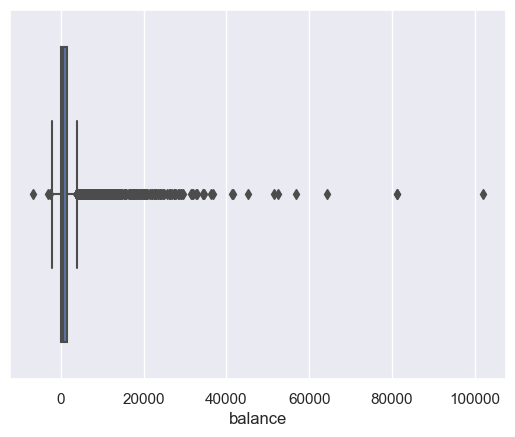

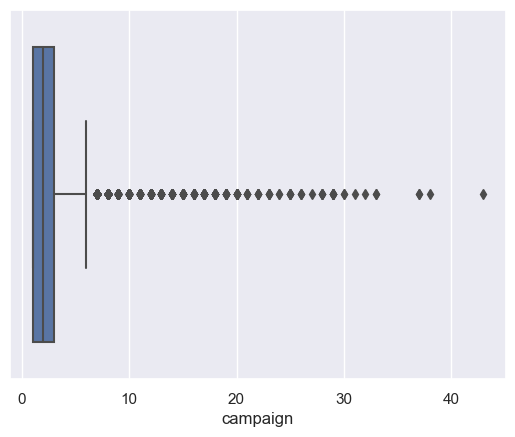

In [12]:
for i in data[['balance','campaign']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

## Outlier treatment

In [13]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_2074/59704685.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_2074/59704685.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)


In [14]:
for i in data[['balance','campaign']]:
    data[i]=np.where(data[i]>Upper[i],Upper[i],data[i])
    data[i]=np.where(data[i]<Lower[i],Lower[i],data[i])

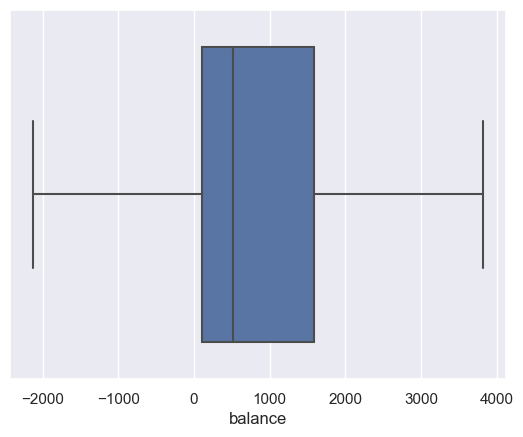

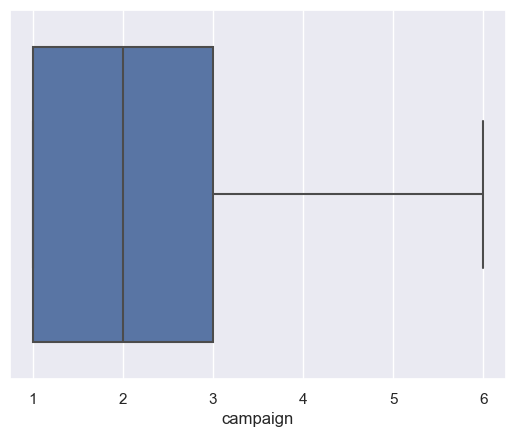

In [15]:
for i in data[['balance','campaign']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

## Now transform data using dumies method

In [16]:
data = pd.get_dummies(data, drop_first=True)

data

,age,balance,day,campaign,result,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,response_other,response_success,response_unknown
0,29,3826.375,11,2.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,26,512.000,5,3.0,1,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,30,135.000,14,2.0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,41,30.000,10,1.0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,27,321.000,2,1.0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,47,1167.000,30,1.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12866,31,111.000,21,2.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12867,37,1316.000,18,1.0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12868,42,479.000,28,2.0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


## We checking again if there is missing value

In [17]:
data.isnull().sum()

age                    0
balance                0
day                    0
campaign               0
result                 0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
response_other         0
response_success       0
response_unknown       0
dtype: int64

## After dumies method we look data columns

In [18]:
data.columns

Index(['age', 'balance', 'day', 'campaign', 'result', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'response_other',
       'response_success', 'response_unknown'],
      dtype='object')

# MODELLING

## Inputs and output

In [19]:
inputs = data.drop('result',axis=1)
output = data['result']

## Train test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.3, random_state = 42)

# Default model

## Create function to measure Gini

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [22]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_pred = roc_auc_score(y_test, y_pred)
    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_pred = roc_pred*2-1
    gini_prob = roc_prob*2-1
    
    print('Model Performance')

    print('Gini pred is', gini_pred*100)
    print('Gini prob is', gini_prob*100)
    
    return gini_pred
    return gini_prob

## Fit our model

In [23]:
from sklearn.ensemble import RandomForestClassifier

base_model = RandomForestClassifier()
base_model.fit(X_train,y_train)

RandomForestClassifier()

## Look our Default model's performance

In [24]:
base_mod_accuracy = evaluate(base_model,X_test,y_test)

Model Performance
Gini pred is 40.03140182486078
Gini prob is 53.363352687917185


# Optimization model

## Create function to select best estimators

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
n_estimators= [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 20)]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 15, 20, 25, 31, 36, 41, 46, 52, 57, 62, 67, 73, 78, 83, 88, 94, 99, 104, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


## Fit model

In [27]:
base_model_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=42, n_jobs = -1)

base_model_random.fit(X_train,y_train)

/Users/ulvigarakhanli/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ulvigarakhanli/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ulvigarakhanli/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 20, 25, 31, 36,
                                                      41, 46, 52, 57, 62, 67,
                                                      73, 78, 83, 88, 94, 99,
                                                      104, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=42)

## Look best estimators

In [28]:
base_model_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 62}

## Optimized model performance

In [29]:
optimized_model = base_model_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Model Performance
Gini pred is 40.987313127606484
Gini prob is 56.085162717388656


## Create roc curve graph to compare base_model and optimized_model

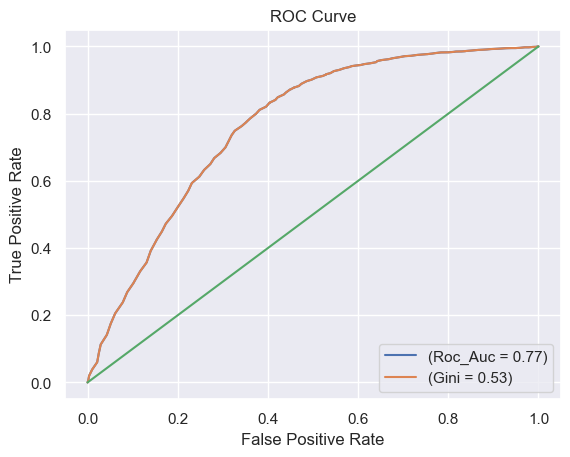

In [30]:
y_prob = base_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

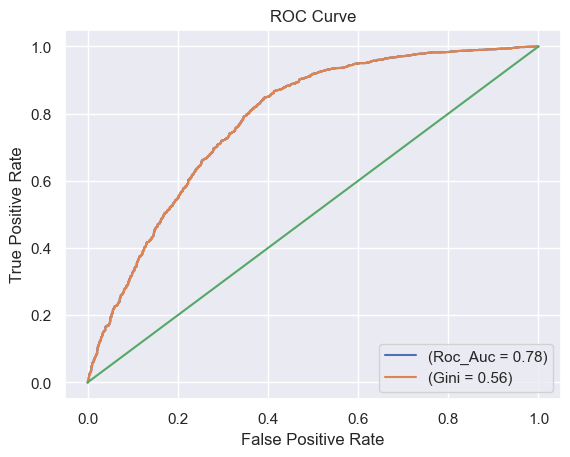

In [31]:
y_prob = optimized_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Deployment

## Our optimized model showed higher Gini coefficient given 56%, hence we will deploy our trained model on new marketing data

In [32]:
test_data = pd.read_excel(r'marketing_test.xlsx')
test_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response
0,812,25,blue-collar,single,secondary,no,764,yes,no,cellular,18,may,1,-1,0,unknown
1,71,40,blue-collar,single,primary,no,118,no,no,unknown,23,feb,1,-1,0,unknown
2,912,27,admin.,divorced,secondary,no,451,yes,no,cellular,16,jul,1,-1,0,unknown
3,43,30,services,single,secondary,no,495,yes,no,cellular,21,nov,1,-1,0,unknown
4,431,36,blue-collar,married,primary,no,1548,yes,yes,cellular,18,may,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,43,blue-collar,married,secondary,no,413,yes,no,cellular,12,aug,2,182,4,success
853,409,56,management,married,tertiary,no,1282,no,no,cellular,19,aug,4,-1,0,unknown
854,105,54,admin.,married,primary,no,976,yes,no,unknown,3,jun,3,-1,0,unknown
855,810,30,unemployed,single,tertiary,no,1159,no,no,telephone,5,jun,1,-1,0,unknown


In [33]:
X_train

,age,balance,day,campaign,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,response_other,response_success,response_unknown
10678,35,91.0,23,4.0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
5635,46,2173.0,21,5.0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9343,30,2568.0,4,1.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4581,38,-210.0,8,1.0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
12117,41,849.0,12,4.0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,44,2897.0,5,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5191,44,1058.0,11,3.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5390,29,220.0,4,2.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
860,51,317.0,13,4.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [34]:
test_data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays',
       'previous', 'response'],
      dtype='object')

In [35]:
test_data = test_data[['ID','age','balance','day','campaign','marital','education','default','housing','loan','contact','month','response']]
test_data

,ID,age,balance,day,campaign,marital,education,default,housing,loan,contact,month,response
0,812,25,764,18,1,single,secondary,no,yes,no,cellular,may,unknown
1,71,40,118,23,1,single,primary,no,no,no,unknown,feb,unknown
2,912,27,451,16,1,divorced,secondary,no,yes,no,cellular,jul,unknown
3,43,30,495,21,1,single,secondary,no,yes,no,cellular,nov,unknown
4,431,36,1548,18,2,married,primary,no,yes,yes,cellular,may,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,43,413,12,2,married,secondary,no,yes,no,cellular,aug,success
853,409,56,1282,19,4,married,tertiary,no,no,no,cellular,aug,unknown
854,105,54,976,3,3,married,primary,no,yes,no,unknown,jun,unknown
855,810,30,1159,5,1,single,tertiary,no,no,no,telephone,jun,unknown


In [36]:
test_data = pd.get_dummies(test_data, drop_first=True)

test_data

,ID,age,balance,day,campaign,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,response_other,response_success,response_unknown
0,812,25,764,18,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,71,40,118,23,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,912,27,451,16,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,43,30,495,21,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,431,36,1548,18,2,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,43,413,12,2,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
853,409,56,1282,19,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
854,105,54,976,3,3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
855,810,30,1159,5,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [37]:
test_data.isnull().sum()

ID                     0
age                    0
balance                0
day                    0
campaign               0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
response_other         0
response_success       0
response_unknown       0
dtype: int64

In [38]:
test_data.columns

Index(['ID', 'age', 'balance', 'day', 'campaign', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'response_other',
       'response_success', 'response_unknown'],
      dtype='object')

In [39]:
prob = optimized_model.predict_proba(test_data.iloc[:,1:])[:,1]

In [40]:
test_data['PD'] = prob
test_data

,ID,age,balance,day,campaign,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,response_other,response_success,response_unknown,PD
0,812,25,764,18,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.408402
1,71,40,118,23,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.855218
2,912,27,451,16,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.380423
3,43,30,495,21,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.550859
4,431,36,1548,18,2,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.859951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,43,413,12,2,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.102481
853,409,56,1282,19,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.698879
854,105,54,976,3,3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.925327
855,810,30,1159,5,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.216671
